# Lesson 1:  Shapely & Geometry Objects

## Point Data

In [1]:
# import shapely
from shapely.geometry import Point

# create point objects
point1 = Point(2.2, 4.2)
point2 = Point(7.2, -25.1)
point3 = Point(9.26, -2.456)
point4_3D = Point(9.26, -2.456, 0.57)

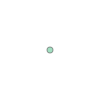

In [2]:
# view contents of variable
point4_3D

In [3]:
# view data type
type(point1)

shapely.geometry.point.Point

In [4]:
# Get coordinate tuple(s)
list(point1.coords)

[(2.2, 4.2)]

In [5]:
# read x and y coordianters separately
x = point1.x
y = point1.y

print(x, y)

2.2 4.2


In [6]:
# read x, y, and z
x = point4_3D.x
y = point4_3D.y
z = point4_3D.z

print(x, y, z)

9.26 -2.456 0.57


In [7]:
# calculate the distance between point1 and point2
dist = point1.distance(point2)

# print info message
print(f"Distance between the points is {dist:.2f} units")

Distance between the points is 29.72 units


## Line Data

In [8]:
# import the LineString class
from shapely.geometry import LineString

# create a LineString from out Point objects
line = LineString([point1, point2, point3])

In [9]:
# create a LineString from a list of coordinates:
# (with the same coordinate values as the points, so results should be identical)
line2 = LineString([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])

In [10]:
# verify that the two lines are identical
line == line2

True

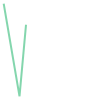

In [11]:
line

In [12]:
print(line)

LINESTRING (2.2 4.2, 7.2 -25.1, 9.26 -2.456)


In [13]:
# get the length of the line
line_length = line.length
print(f"Length of our line: {line_length:.1f} units")

Length of our line: 52.5 units


In [14]:
# get the center point of the line
print(line.centroid)

POINT (6.229961354035622 -11.892411157572392)


In [15]:
# import shapely
from shapely.geometry import Polygon

#create a polygon from the coordinates
polygon1 = Polygon([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])

In [16]:
# construct the polygon directly from a list of points
polygon2 = Polygon([point1, point2, point3])

In [17]:
from shapely.geometry import LinearRing

shell = LinearRing([point1, point2, point3, point1])
polygon3 = Polygon(shell)

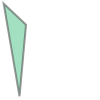

In [18]:
polygon1

In [19]:
# check the data type
type(polygon1)

shapely.geometry.polygon.Polygon

In [20]:
polygon1.geom_type

'Polygon'

In [22]:
# define the exterior
outer = LinearRing([(-180, 90),(-180, -90),(180,-90),(180,90)])

# define a hole
hole = LinearRing([(-170, 80), (-100,-80),(-100,-80),(100,-80),(170,80)])

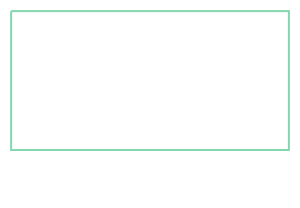

In [23]:
outer

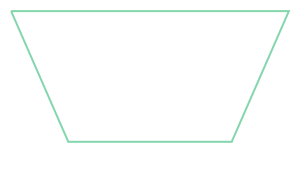

In [24]:
hole

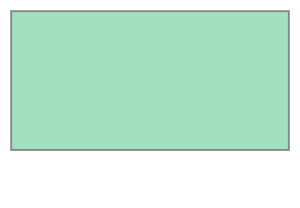

In [28]:
# a polygon using only the exterior shell
polygon_with_hole = Polygon(outer)
polygon_with_hole

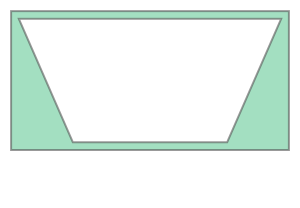

In [26]:
# a polygon defined by the exterior shell, and one hole
polygon_without_hole = Polygon(outer,[hole])
polygon_without_hole

## Polygon Properties & Methods

In [29]:
print(f"Polygon centroid: {polygon_with_hole.centroid}")
print(f"Polygon area: {polygon_with_hole.area}")
print(f"Polygon bounding box: {polygon_with_hole.bounds}")
print(f"Polygon exterior ring: {polygon_with_hole.exterior}")
print(f"Polygon circumfrence: {polygon_with_hole.exterior.length}")

Polygon centroid: POINT (0 0)
Polygon area: 64800.0
Polygon bounding box: (-180.0, -90.0, 180.0, 90.0)
Polygon exterior ring: LINEARRING (-180 90, -180 -90, 180 -90, 180 90, -180 90)
Polygon circumfrence: 1080.0


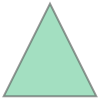

In [31]:
# Triangle
Polygon([(0,0),(2,4),(4,0)])

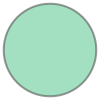

In [30]:
# Cirle (using a bugger around a point)
point = Point((0,0))
point.buffer(1)

## Geometry Collections
In shapely, collections of points are implemented as MultiPoint geometries, collections of lines as MultiString geometries, and collections of polygons as MultiPolygon geometries

In [33]:
from shapely.geometry import MultiPoint, MultiLineString, MultiPolygon

# create a multipoint object from points 1, 2 and 3
multipoint = MultiPoint([point1, point2, point3])

# create a multilinestring with two lines
line1 = LineString([point1, point2])
line2 = LineString([point2, point3])
multiline = MultiLineString([line1, line2])

print(multipoint)
print(multiline)

MULTIPOINT (2.2 4.2, 7.2 -25.1, 9.26 -2.456)
MULTILINESTRING ((2.2 4.2, 7.2 -25.1), (7.2 -25.1, 9.26 -2.456))


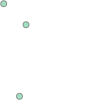

In [34]:
multipoint

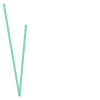

In [35]:
multiline

POLYGON ((-180 90, -180 -90, 0 -90, 0 90, -180 90))


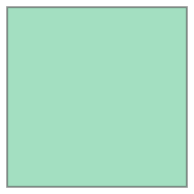

In [37]:
# let's create the exterior of the western part of the world
western_hemisphere = Polygon([(-180, 90), (-180, -90), (0, -90), (0, 90)])
print(western_hemisphere)
western_hemisphere

POLYGON ((180 -90, 180 90, 0 90, 0 -90, 180 -90))


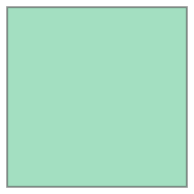

In [39]:
from shapely.geometry import box
min_x = 0
max_x = 180
min_y = -90
max_y = 90

eastern_hemisphere = box(min_x, min_y, max_x, max_y)

print(eastern_hemisphere)
eastern_hemisphere

MULTIPOLYGON (((-180 90, -180 -90, 0 -90, 0 90, -180 90)), ((180 -90, 180 90, 0 90, 0 -90, 180 -90)))


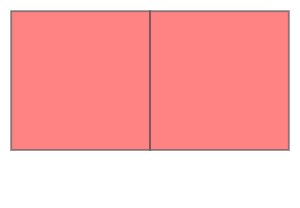

In [40]:
# combining two polygons into a multipolygon
# pass multiple polygon objects as a list

multipolygon = MultiPolygon([western_hemisphere, eastern_hemisphere])

print(multipolygon)
multipolygon

## Convex Hull and Envelope
Convex hulls are useful to describe the extent of datasets

In [41]:
# convex hull
[multipoint.convex_hull, multipoint]

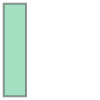

In [42]:
# envelope
multipoint.envelope

## Validity of Geometries

In [43]:
print(f"Is polygon valid?: {polygon_with_hole.is_valid}")

Is polygon valid?: True
